<a href="https://colab.research.google.com/github/KravtsovaAlyona/data_science_platform/blob/main/04_2_%D0%9A%D1%80%D0%B0%D0%B2%D1%86%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Практическая работа 4-2: Линейная регрессия 2

Name: Кравцова А.Е

Email: KravtsovaAE@mgpu.ru


## ##  Анализ набора кредитных данных

Вспомните набор данных «Кредит», рассмотренный на занятии и доступный [здесь](http://www-bcf.usc.edu/~gareth/ISL/data.html).
Этот набор данных состоит из информации о кредитных картах 400 человек.

Сначала импортируйте данные и преобразуйте доход в тысячи.

Набор данных `Credit` содержит 11 характеристик:
- `Income` - доход,
- `Limit` - лимит кредитных средств,
- `Rating`- кредитный рейтинг,
- `Cards` - количество банковских карт,
- `Age` - возраст,
- `Education`- образование,
- `Gender`- пол,
- `Student` - статус студента,
- `Married` - семейное положение,
- `Ethnicity` - этническая принадлежность,
- `Balance` - баланс.


In [65]:
#импорт библиотек

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [66]:
from google.colab import files
uploaded = files.upload()


# Import data from Credit.csv file
credit = pd.read_csv('Credit.csv',index_col=0) #load data
credit["Income"] = credit["Income"].map(lambda x: 1000*x)
credit

Saving Credit.csv to Credit (1).csv


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14891.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106025.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104593.0,7075,514,4,71,11,Male,No,No,Asian,580
4,148924.0,9504,681,3,36,11,Female,No,No,Asian,964
5,55882.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
396,12096.0,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13364.0,3838,296,5,65,17,Male,No,No,African American,480
398,57872.0,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37728.0,2525,192,1,44,13,Male,No,Yes,Caucasian,0


Перед выполнением заданий необзодимо просмотреть данные, которые даны


In [67]:
print(credit.dtypes, '\n')
print(credit['Gender'].value_counts(), '\n')
print(credit['Student'].value_counts(), '\n')
print(credit['Married'].value_counts(), '\n')
print(credit['Ethnicity'].value_counts())
credit.describe()

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object 

Gender
Female    207
 Male     193
Name: count, dtype: int64 

Student
No     360
Yes     40
Name: count, dtype: int64 

Married
Yes    245
No     155
Name: count, dtype: int64 

Ethnicity
Caucasian           199
Asian               102
African American     99
Name: count, dtype: int64


,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45218.885000,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35244.273165,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10354.000000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21007.250000,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33115.500000,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57470.750000,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186634.000000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [68]:
credit["Income"] = credit["Income"].map(lambda x: 1000*x)
print(credit[:10])

         Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
1    14891000.0   3606     283      2   34         11    Male      No     Yes   
2   106025000.0   6645     483      3   82         15  Female     Yes     Yes   
3   104593000.0   7075     514      4   71         11    Male      No      No   
4   148924000.0   9504     681      3   36         11  Female      No      No   
5    55882000.0   4897     357      2   68         16    Male      No     Yes   
6    80180000.0   8047     569      4   77         10    Male      No      No   
7    20996000.0   3388     259      2   37         12  Female      No      No   
8    71408000.0   7114     512      2   87          9    Male      No      No   
9    15125000.0   3300     266      5   66         13  Female      No      No   
10   71061000.0   6819     491      3   41         19  Female     Yes     Yes   

           Ethnicity  Balance  
1          Caucasian      333  
2              Asian      903  
3           

In [69]:
correlation_matrix = credit[['Limit', 'Rating', 'Income', 'Age', 'Cards', 'Balance', 'Education']].corr()
correlation_matrix

,Limit,Rating,Income,Age,Cards,Balance,Education
Limit,1.000000,0.996880,0.792088,0.100888,0.010231,0.861697,-0.023549
Rating,0.996880,1.000000,0.791378,0.103165,0.053239,0.863625,-0.030136
Income,0.792088,0.791378,1.000000,0.175338,-0.018273,0.463656,-0.027692
Age,0.100888,0.103165,0.175338,1.000000,0.042948,0.001835,0.003619
Cards,0.010231,0.053239,-0.018273,0.042948,1.000000,0.086456,-0.051084
Balance,0.861697,0.863625,0.463656,0.001835,0.086456,1.000000,-0.008062
Education,-0.023549,-0.030136,-0.027692,0.003619,-0.051084,-0.008062,1.000000


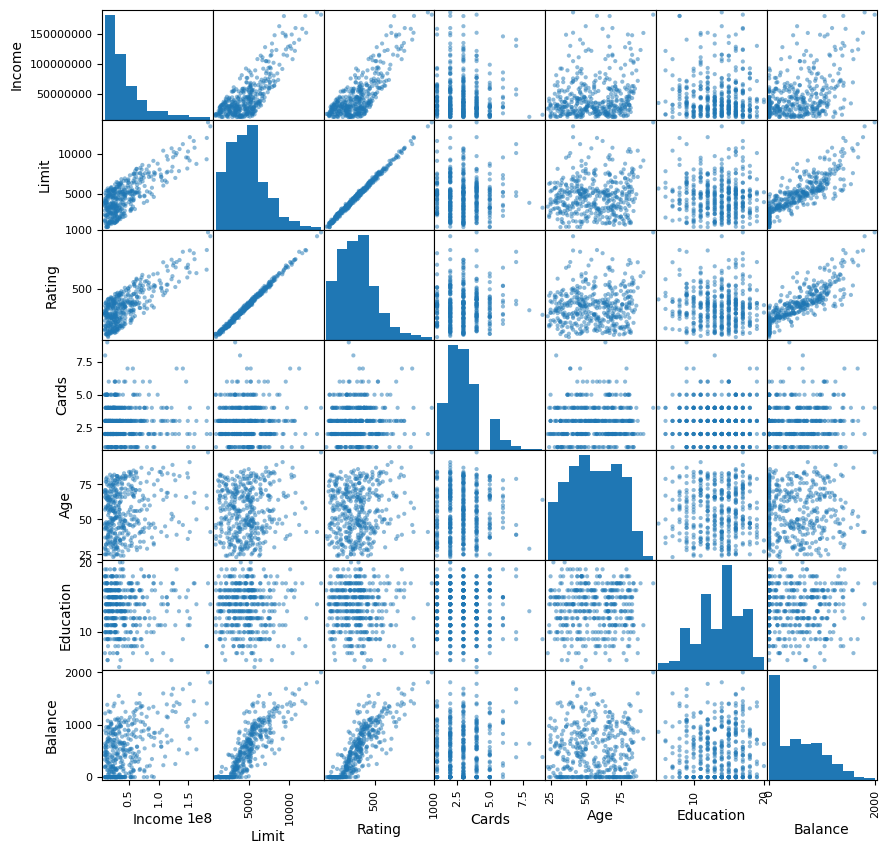

In [70]:
pd.plotting.scatter_matrix(credit, figsize=(10, 10), diagonal='hist');


**Промежуточный вывод**

Есть сильная связь между:
*   Лимитом и рейтингом (99%)
*   Лимитом и доходом (79%)
*   Лимитом и балансом (86%)

С переменными количество карт, образование, возраст связи нет



## Задание 1. Первая регрессионная модель

**Упражнение:** Лимит средств по рейтингу:


$$
\text{Limit} = \beta_0 + \beta_1 \text{Rating}.
$$

Поскольку кредитные рейтинги в основном используются банками для определения кредитных лимитов, ожидаем, что рейтинг будет в прямой зависимости для лимита, поэтому эта регрессия должна быть очень хорошей.

Используйте функцию `ols` из библиотеки Python `statsmodels`. Каково значение $R^2$? Что такое $H_0$ и $H_A$ для соответствующей проверки гипотезы и каково значение $p$?


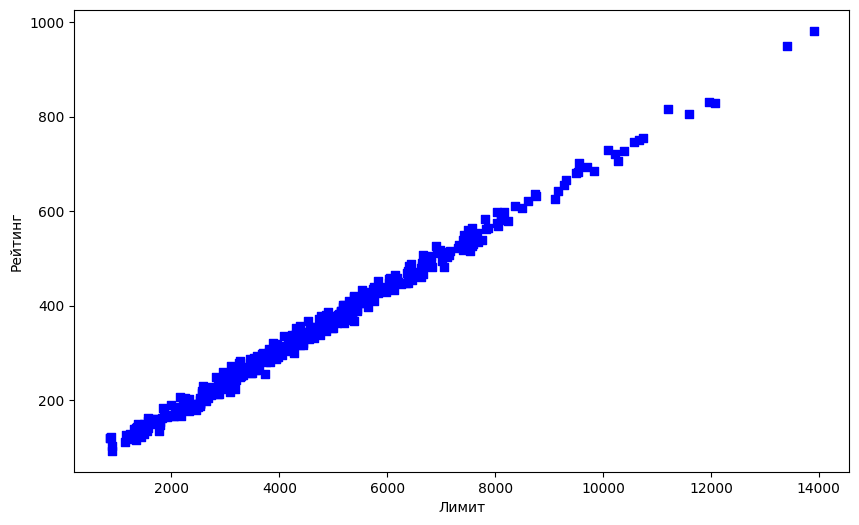

In [71]:
plt.scatter(x=credit['Limit'], y=credit['Rating'], c='b',marker='s')

plt.xlabel('Лимит')
plt.ylabel('Рейтинг')
plt.show()

In [72]:
limit_rating_ols = sm.ols(formula="Limit ~ Rating", data=credit).fit()
limit_rating_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Mon, 13 May 2024   Prob (F-statistic):               0.00
Time:                        20:52:17   Log-Likelihood:                -2649.1
No. Observations:                 400   AIC:                             5302.
Df Residuals:                     398   BIC:                             5310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -542.9282     22.850    -23.760      0.000    -587.851    -498.006
Rating        14.8716      0.059    251.949      0.000      14.756      14.988
==============================================================================
Omnibus:                        6.887   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.980
Skew:                          -0.145   Prob(JB):                       0.0829
Kurtosis:                       2.537   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$H_0$ : B1 = 0 (рейтинг не влияет на лимит)

$H_A$: B1 ≠ 0 (рейтинг оказывает значительное влияние на лимит)

**Ваш ответ:**
Модель описывает 99,4% случаев

*   $R^2 = 99,4\%$
*   Значение $F-statistic$ равно 0, значит модель статистически значима
*   p-value < 0,05, значит есть корреляция между переменными
*   B1 ≠ 0, отклоняем нулевую гипотезу

Интерпретация: лимит и кредитный рейтинг определяют друг друга. Чем выше кредитный рейтинг, тем больше лимит предоставленных средств



## Задание 2: Прогнозирование лимита без рейтинга

Поскольку `Рейтинг` и `Лимит` — это практически одна и та же переменная, исключим `Рейтинг` и просто попробуем спрогнозировать `Лимит` на основе вещественнозначных переменных (некатегориальных переменных): Доход, Карты, Возраст, Образование, Баланс.

**Упражнение.** Разработайте модель множественной линейной регрессии для прогнозирования рейтинга. Интерпретируйте результаты.

А пока просто сосредоточьтесь на переменных с численными значениями (доход, карты, возраст, образование, баланс).

В первом приближении не использовать категориальные переменные (Пол, Студент, Семейное положение, Этническая принадлежность).



Т.к доход и баланс показали лучшие значения, построю модели с использованием этих столбцов

**Модель 1:** Лимит средств по доходу:


$$
\text{Limit} = \beta_0 + \beta_1 \text{Income}.
$$


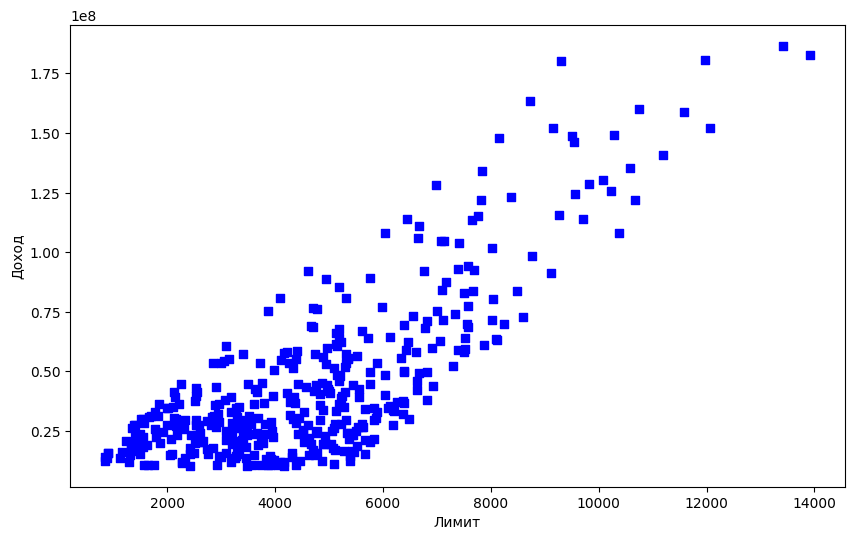

In [73]:
plt.scatter(x=credit['Limit'], y=credit['Income'], c='b',marker='s')
plt.xlabel('Лимит')
plt.ylabel('Доход')
plt.show()

По графику видно, что существует некий тренд, но несмотря на это данные неравномерно распределены

In [74]:
limit_income_ols = sm.ols(formula="Limit ~ Income", data=credit).fit()
limit_income_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     670.2
Date:                Mon, 13 May 2024   Prob (F-statistic):           2.39e-87
Time:                        20:53:05   Log-Likelihood:                -3467.3
No. Observations:                 400   AIC:                             6939.
Df Residuals:                     398   BIC:                             6947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2389.8694    114.829     20.812      0.000    2164.123    2615.616
Income      5.188e-05      2e-06     25.888      0.000    4.79e-05    5.58e-05
==============================================================================
Omnibus:                      141.700   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.008
Skew:                          -0.064   Prob(JB):                     2.74e-05
Kurtosis:                       1.885   Cond. No.                     9.33e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$H_0$ : B1 = 0 (доходг не влияет на лимит)

$H_A$: B1 ≠ 0 (доход оказывает значительное влияние на лимит)

**Ваш ответ:**
62,7% вариаций лимитов могут быть объяснены доходом

*   $R^2 = 62,7\%$
*   Значение $p$ для F-статистики небольшое, соответсвенно модель статистически значима
*   B1 ≠ 0, отклюняем нулевую гипотезу

Получается следующее уравнение:

$$
\text{Limit} = 2389,869 + 5,188 \text{Balance}
$$


**Модель 2:** Лимит средств по балансу карты испытуемого:




$$
\text{Limit} = \beta_0 + \beta_1 \text{Balance}.
$$


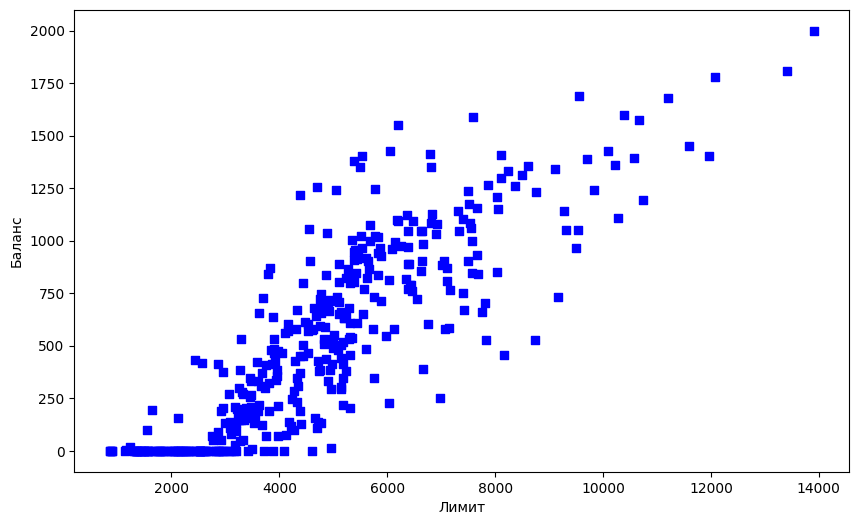

In [75]:
plt.scatter(x=credit['Limit'], y=credit['Balance'], c='b',marker='s')
plt.xlabel('Лимит')
plt.ylabel('Баланс')
plt.show()

In [76]:
limit_balance_ols = sm.ols(formula="Limit ~ Balance", data=credit).fit()
limit_balance_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1148.
Date:                Mon, 13 May 2024   Prob (F-statistic):          2.53e-119
Time:                        20:53:46   Log-Likelihood:                -3393.4
No. Observations:                 400   AIC:                             6791.
Df Residuals:                     398   BIC:                             6799.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2485.9566     88.586     28.063      0.000    2311.802    2660.111
Balance        4.3261      0.128     33.879      0.000       4.075       4.577
==============================================================================
Omnibus:                       21.227   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.462
Skew:                           0.424   Prob(JB):                     4.00e-07
Kurtosis:                       4.024   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Ваш ответ:**
74,3% вариаций зависимой переменной (лимита) объясняется независимой переменной (баланс)

*   $R^2 = 74,3\%$
*   Значение $p$ для F-статистики небольшое, соответсвенно есть корреляция между переменными

Получается следующее уравнение:

$$
\text{Limit} = 2485,957 + 4,326 \text{Balance}
$$



**Модель 3:** Лимит средств по балансу карты и доходу испытуемого:




$$
\text{Limit} = \beta_0 + \beta_1 \text{Balance}  + \beta_2 \text{Income}
$$

In [77]:
limit_income_balance_ols = sm.ols(formula="Limit ~ Balance + Income", data=credit).fit()
limit_income_balance_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     3046.
Date:                Mon, 13 May 2024   Prob (F-statistic):          1.37e-241
Time:                        20:53:57   Log-Likelihood:                -3106.0
No. Observations:                 400   AIC:                             6218.
Df Residuals:                     397   BIC:                             6230.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1610.3665     49.710     32.395      0.000    1512.639    1708.094
Balance        3.1621      0.070     44.955      0.000       3.024       3.300
Income      3.275e-05   9.18e-07     35.691      0.000    3.09e-05    3.46e-05
==============================================================================
Omnibus:                       72.111   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.872
Skew:                          -1.278   Prob(JB):                     1.39e-24
Kurtosis:                       3.241   Cond. No.                     9.95e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Ваш ответ:**
 93,9% вариаций зависимой переменной (лимита) объясняются независимыми переменными (доход и баланс)

*   $R^2 = 93,9\%$
*   Значение $p$ для F-статистики небольшое (1.37e-241), соответсвенно корреляции между переменными присутствует

Получается следующее уравнение:

$$
\text{Limit} = 1610,367 + 3,162 \text{Balance}  + 3,275 \text{Income}
$$


Какие независимые переменные являются хорошими/плохими предикторами? Какая модель в целом является лучшей?

**Ваш ответ:** самой лучшей моделью можно назвать модель №3, так как имеет наибольше значение $R^2$ и $p-value$ меньше 0,05. Также можно выделить модель №2, т.к баланс - переменная с наибольшим влиянием на лимит по кредитной карте

## Задание 3. Включение категориальных переменных в модель регрессии

Рассмотреть двоичные категориальные переменные, которые были ранее сопоставлены с целочисленными значениями 0, 1 в в `лекции 4.2`.

In [78]:
credit2=credit
credit2["Gender_num"] = credit2["Gender"].map({' Male':0, 'Female':1})
credit2["Student_num"] = credit2["Student"].map({'Yes':1, 'No':0})
credit2["Married_num"] = credit2["Married"].map({'Yes':1, 'No':0})

In [79]:
dummy = pd.get_dummies(credit2['Ethnicity'])
credit2 = pd.concat([credit2,dummy],axis=1)
credit2=credit2.rename(columns={'African American':'American'})
credit2

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Gender_num,Student_num,Married_num,American,Asian,Caucasian
1,14891000.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,1,False,False,True
2,106025000.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1,1,1,False,True,False
3,104593000.0,7075,514,4,71,11,Male,No,No,Asian,580,0,0,0,False,True,False
4,148924000.0,9504,681,3,36,11,Female,No,No,Asian,964,1,0,0,False,True,False
5,55882000.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,12096000.0,4100,307,3,32,13,Male,No,Yes,Caucasian,560,0,0,1,False,False,True
397,13364000.0,3838,296,5,65,17,Male,No,No,African American,480,0,0,0,True,False,False
398,57872000.0,4171,321,5,67,12,Female,No,Yes,Caucasian,138,1,0,1,False,False,True
399,37728000.0,2525,192,1,44,13,Male,No,Yes,Caucasian,0,0,0,1,False,False,True


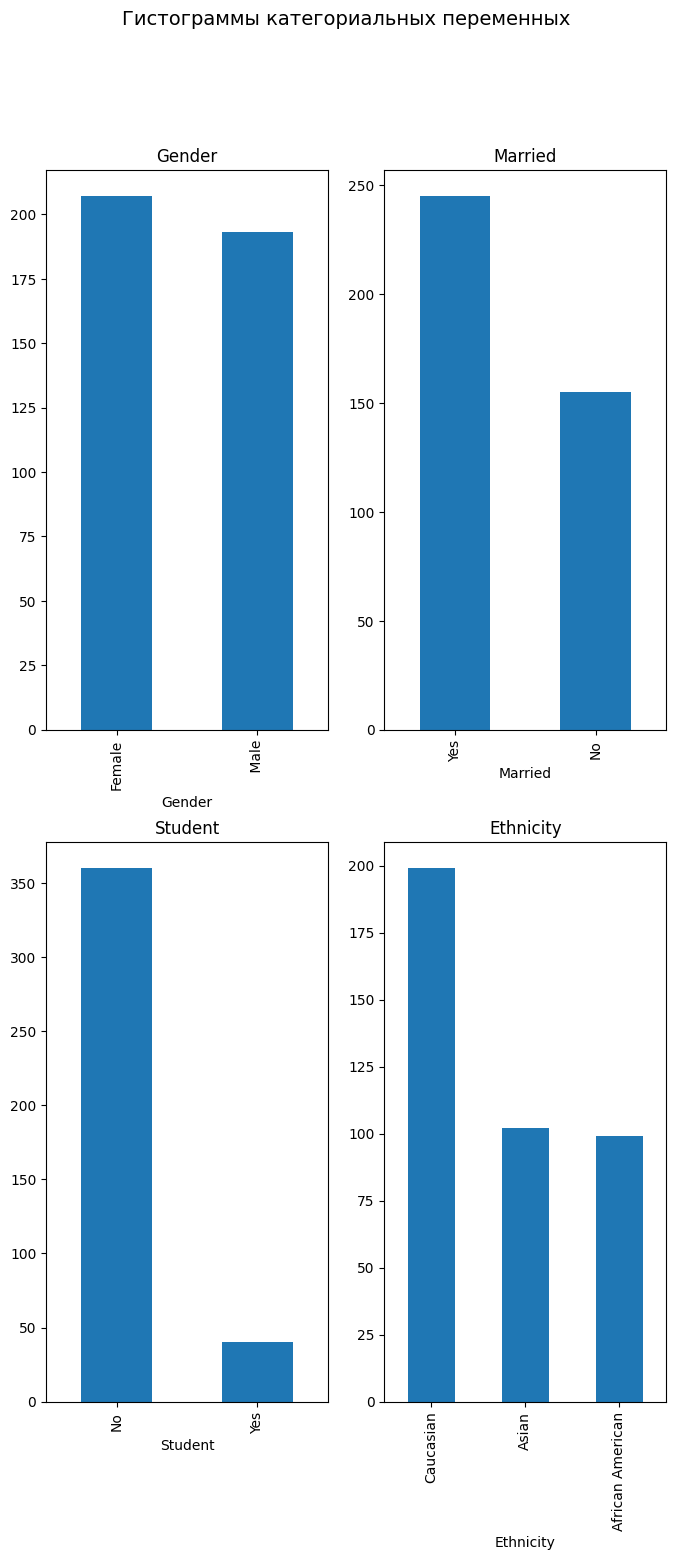

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(8,16))
credit2["Gender"].value_counts().plot(kind='bar',ax=axes[0,0],title='Gender');
credit2["Student"].value_counts().plot(kind='bar',ax=axes[1,0],title='Student');
credit2["Married"].value_counts().plot(kind='bar',ax=axes[0,1],title='Married');
credit2["Ethnicity"].value_counts().plot(kind='bar',ax=axes[1,1],title='Ethnicity');
fig.suptitle('Гистограммы категориальных переменных',fontsize=14)
plt.show()

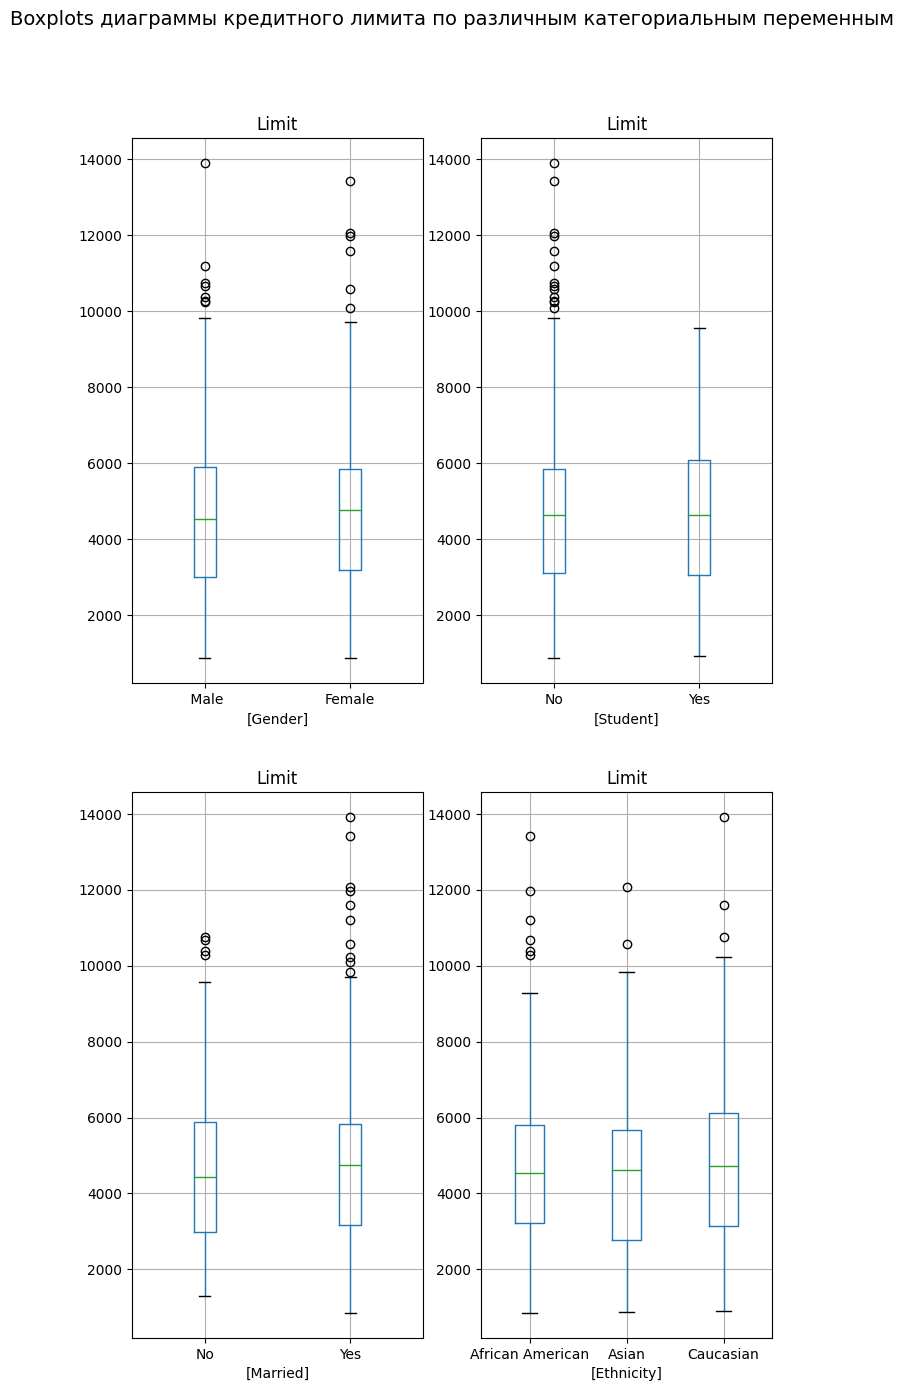

In [81]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(8,16))
credit2.boxplot(column=['Limit'], by=['Gender'],ax=axes[0,0])
credit2.boxplot(column=['Limit'], by=['Student'],ax=axes[0,1])
credit2.boxplot(column=['Limit'], by=['Married'],ax=axes[1,0])
credit.boxplot(column=['Limit'], by=['Ethnicity'],ax=axes[1,1])
fig.suptitle('Boxplots диаграммы кредитного лимита по различным категориальным переменным', fontsize=14)
plt.show()

**Наблюдение**:

*   лимиты женатых людей выше неженатых
*   студентам не дают большой лимит средств


In [82]:
#удаляю ненужные столбцы
credit3=credit2
credit3=credit3.drop(['Gender', 'Married', 'Student', 'Ethnicity'], axis=1)
credit3

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_num,Student_num,Married_num,American,Asian,Caucasian
1,14891000.0,3606,283,2,34,11,333,0,0,1,False,False,True
2,106025000.0,6645,483,3,82,15,903,1,1,1,False,True,False
3,104593000.0,7075,514,4,71,11,580,0,0,0,False,True,False
4,148924000.0,9504,681,3,36,11,964,1,0,0,False,True,False
5,55882000.0,4897,357,2,68,16,331,0,0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,12096000.0,4100,307,3,32,13,560,0,0,1,False,False,True
397,13364000.0,3838,296,5,65,17,480,0,0,0,True,False,False
398,57872000.0,4171,321,5,67,12,138,1,0,1,False,False,True
399,37728000.0,2525,192,1,44,13,0,0,0,1,False,False,True


In [83]:
credit3.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_num,Student_num,Married_num,American,Asian,Caucasian
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656,-0.010738,0.019632,0.035652,0.040132,-0.017137,-0.019701
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697,0.009397,-0.006015,0.031155,0.036320,-0.032427,-0.003081
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625,0.008885,-0.002028,0.036751,0.037598,-0.035999,-0.001070
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456,-0.022658,-0.026164,-0.009695,0.000878,0.005591,-0.005631
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835,0.004015,-0.029844,-0.073136,0.061169,-0.059623,-0.000822
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062,-0.005049,0.072085,0.048911,0.013827,0.029586,-0.037725
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000,0.021474,0.259018,-0.005673,0.013720,-0.009812,-0.003288
Gender_num,-0.010738,0.009397,0.008885,-0.022658,0.004015,-0.005049,0.021474,1.000000,0.055034,0.012452,-0.014288,0.025425,-0.009831
Student_num,0.019632,-0.006015,-0.002028,-0.026164,-0.029844,0.072085,0.259018,0.055034,1.000000,-0.076974,0.001931,0.053534,-0.048334
Married_num,0.035652,0.031155,0.036751,-0.009695,-0.073136,0.048911,-0.005673,0.012452,-0.076974,1.000000,-0.102707,0.088595,0.011418


По корреляционной матрице категориальные переменные не связаны с другими переменными. Наибольшая связь прослеживается между балансом и студенчеством (2,59%)

**Задание**:Можете ли улучшить модель, которая разработана в задании `2`, включив в нее одну или несколько из этих переменных?


---



 Добавлю в модель №3 переменную семейное положение, половую принадлежность и национальность

**Модель 4:** Лимит средств по балансу карты, доходу  и семейному положению испытуемого:




$$
\text{Limit} = \beta_0 + \beta_1 \text{Balance}  + \beta_2 \text{Income} + \beta_3 \text{Married}
$$

In [84]:
limit_income_balance_married_ols = sm.ols(formula="Limit ~ Balance + Income + Married_num", data=credit3).fit()
limit_income_balance_married_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     2036.
Date:                Mon, 13 May 2024   Prob (F-statistic):          3.38e-240
Time:                        20:55:07   Log-Likelihood:                -3105.0
No. Observations:                 400   AIC:                             6218.
Df Residuals:                     396   BIC:                             6234.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1562.4867     60.808     25.696      0.000    1442.940    1682.033
Balance         3.1645      0.070     45.023      0.000       3.026       3.303
Income        3.27e-05   9.17e-07     35.638      0.000    3.09e-05    3.45e-05
Married_num    80.1222     58.733      1.364      0.173     -35.345     195.589
==============================================================================
Omnibus:                       72.075   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.695
Skew:                          -1.276   Prob(JB):                     1.51e-24
Kurtosis:                       3.253   Cond. No.                     1.51e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Модель 5:** Лимит средств по балансу карты, доходу  и национальности испытуемого:




$$
\text{Limit} = \beta_0 + \beta_1 \text{Balance}  + \beta_2 \text{Income} + \beta_3 \text{Ethnicity}
$$

In [85]:
limit_income_balance_ethnicity_ols = sm.ols(formula="Limit ~ Balance + Income + American + Asian	+ Caucasian	", data=credit3).fit()
limit_income_balance_ethnicity_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1524.
Date:                Mon, 13 May 2024   Prob (F-statistic):          1.50e-238
Time:                        20:55:14   Log-Likelihood:                -3104.9
No. Observations:                 400   AIC:                             6220.
Df Residuals:                     395   BIC:                             6240.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1203.9791     38.049     31.643      0.000    1129.176    1278.782
American[T.True]    438.1645     47.995      9.129      0.000     343.806     532.523
Asian[T.True]       337.8314     46.921      7.200      0.000     245.585     430.078
Caucasian[T.True]   427.9832     37.764     11.333      0.000     353.740     502.227
Balance               3.1620      0.070     44.954      0.000       3.024       3.300
Income             3.273e-05   9.18e-07     35.642      0.000    3.09e-05    3.45e-05
==============================================================================
Omnibus:                       72.183   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.879
Skew:                          -1.277   Prob(JB):                     1.38e-24
Kurtosis:                       3.259   Cond. No.                     1.58e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.26e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Модель 6:** Лимит средств по балансу карты, доходу  и половой принадлежности испытуемого:




$$
\text{Limit} = \beta_0 + \beta_1 \text{Balance}  + \beta_2 \text{Income} + \beta_3 \text{Gender}
$$

In [86]:
limit_income_balance_gender_ols = sm.ols(formula="Limit ~ Balance + Income + Gender_num	", data=credit3).fit()
limit_income_balance_gender_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     2026.
Date:                Mon, 13 May 2024   Prob (F-statistic):          8.51e-240
Time:                        20:55:19   Log-Likelihood:                -3106.0
No. Observations:                 400   AIC:                             6220.
Df Residuals:                     396   BIC:                             6236.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1607.4134     57.891     27.766      0.000    1493.601    1721.226
Balance        3.1619      0.070     44.876      0.000       3.023       3.300
Income      3.275e-05   9.19e-07     35.639      0.000    3.09e-05    3.46e-05
Gender_num     5.7302     57.370      0.100      0.920    -107.057     118.518
==============================================================================
Omnibus:                       72.219   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.084
Skew:                          -1.279   Prob(JB):                     1.25e-24
Kurtosis:                       3.244   Cond. No.                     1.42e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Вывод для моделей 4,5,6**

Значение $R^2$ не изменилось, соответсвенно данные категориальные переменные не оказывают никакого влияния на модель

**Модель 7:** Лимит средств по балансу карты, доходу  и статусу студента испытуемого:




$$
\text{Limit} = \beta_0 + \beta_1 \text{Balance}  + \beta_2 \text{Income} + \beta_3 \text{Student}
$$

In [87]:
limit_income_balance_student_ols = sm.ols(formula="Limit ~ Balance + Income + Student_num	", data=credit3).fit()
limit_income_balance_student_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     4875.
Date:                Mon, 13 May 2024   Prob (F-statistic):          3.55e-312
Time:                        20:55:34   Log-Likelihood:                -2937.6
No. Observations:                 400   AIC:                             5883.
Df Residuals:                     396   BIC:                             5899.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1671.8940     32.784     50.998      0.000    1607.442    1736.346
Balance         3.4730      0.048     72.069      0.000       3.378       3.568
Income       3.112e-05   6.07e-07     51.242      0.000    2.99e-05    3.23e-05
Student_num -1494.7953     65.365    -22.868      0.000   -1623.301   -1366.290
==============================================================================
Omnibus:                       86.280   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.706
Skew:                          -1.295   Prob(JB):                     1.03e-31
Kurtosis:                       4.360   Cond. No.                     1.99e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$R^2$ модели увеличился до 97,4 %, значит независимые переменные доход, баланс и статус студента объясняют 97,4% вариаций зависимой перменной лимит. p значение низкое, модель статистически значима. Если человек не студент, то его лимит денежных средств будет больше